43596.597617041574


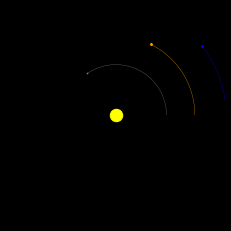

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

axlim=(-1.5e11,1.5e11 )
plt.style.use('dark_background')
fig = plt.figure()
ax = plt.axes(xlim =axlim, ylim =axlim )
ax.set_aspect('equal')
ax.axis('off')

def gforce(p1,ss):
    # Calculate the gravitational force exerted on p1 by p2.
    G = 6.67e-11 # Change to 6.67e-11 to use real-world values.
    # Calculate distance vector between p1 and p2.
    force_vec=0
    for p2 in ss.bodies:
        if p2 !=p1:
          
            r_vec = p1.r-p2.r
    # Calculate magnitude of distance vector.
            r_mag = np.linalg.norm(r_vec)
    # Calcualte unit vector of distance vector.
            r_hat = r_vec/r_mag
    # Calculate force magnitude.
            force_mag = G*p1.mass*p2.mass/r_mag**2
    # Calculate force vector.
            force_vec += -force_mag*r_hat
    
    return force_vec
    
def vel_at_aphelion(r):
    # to calculate all the initial velocities
    G = 6.67e-11
    mu = G*1.989e30
    v= np.sqrt(mu/r)
    return v
class Body(): 
    def __init__(self, name, radius , mass, r , v , color):
        self.name = name
        self.radius = radius
        self.mass = mass
        self.v = np.array(v,dtype=np.float32)
        self.r = np.array(r,dtype=np.float32)
        self.color=color
        self.xs = []
        self.ys = []
        self.plot = ax.scatter (r[0], r[1], color = color, s = np.pi*radius**2)
        self.line, = ax.plot([], [], color=color, linewidth=0.3)

class SolarSystem():
    def __init__(self,bodies=None):
        #self.sun_mass = []
        self.bodies = [] 
    def add_body(self,p):
        self.bodies.append(p)
     
    def orbit(self):
        dt = 24*360
        plots=[]
        lines=[]
        for b in self.bodies:
            b.force = gforce(b,self)
    # Update momenta.
            b.v = b.v + b.force*dt/b.mass
    # Update positions.
            b.r = b.r + b.v*dt
            #t = t + dt
            b.plot.set_offsets(b.r[:2])
            plots.append(b.plot)
            b.xs.append(b.r[0])
            b.ys.append(b.r[1])
            b.line.set_xdata(b.xs)
            b.line.set_ydata(b.ys)
            lines.append(b.line)
           
        return plots+lines


ss = SolarSystem()


ss.add_body(Body( 'Sun', radius=7, color='yellow',
               mass = 1.989e30, v=[0,0,0], r= [0,0,0]))
ss.add_body(Body('Mercury', radius=0.4, color='gray',
               mass = 0.330e24, v=[0,vel_at_aphelion(69.8e9),0], r= [69.8e9,0,0]))

ss.add_body(Body( 'Venus', radius=1, color='orange',
               mass =4.87e24, v=[0,vel_at_aphelion(1.089e11),0], r= [1.089e11,0,0]))

ss.add_body(Body( 'Earth', radius=1, color='blue',
               mass = 5.972e24, v=[0,vel_at_aphelion(1.521e11),0], r= [1.521e11,0,0]))
ss.add_body(Body( 'Mars', radius=1, color='red',
               mass =0.642e24, v=[0,vel_at_aphelion(2.492e11),0], r= [2.492e11,0,0]))

ss.add_body(Body( 'Jupiter', radius=3, color='darkorange',
               mass =1898e24, v=[0,vel_at_aphelion(8.166e11),0], r= [8.166e11,0,0]))
ss.add_body(Body( 'Saturn', radius=1, color='navajowhite',
               mass =568e24, v=[0,vel_at_aphelion(15.145e11),0], r= [15.145e11,0,0]))
ss.add_body(Body( 'Uranus', radius=1, color='mediumturquoise',
               mass =86.8e24, v=[0,vel_at_aphelion(30.036e11),0], r= [30.036e11,0,0]))
ss.add_body(Body( 'Neptune', radius=1, color='cornflowerblue',
               mass =102e24, v=[0,vel_at_aphelion(45.457e11),0], r= [45.457e11,0,0]))

ss.add_body(Body( 'Pluto', radius=1, color='teal',
               mass =0.0146e24, v=[0,vel_at_aphelion(73.759e11),0], r= [73.759e11,0,0]))









print(vel_at_aphelion(69.8e9))
#ss.add_body(sun)
#ss.add_body(earth)
#ss.add_body(mercury)

t=0

for i in range(400):
    ss.orbit()

def animate(i):
    return ss.orbit()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=2*365, blit=True, interval=20,)
plt.show()






    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

axlim=(-47e11, 47e11 )
plt.style.use('dark_background')
fig = plt.figure()
ax = plt.axes(xlim =axlim, ylim =axlim )
ax.set_aspect('equal')
ax.axis('off')

def gforce(p1,ss):
    # Calculate the gravitational force exerted on p1 by p2.
    G = 6.67e-11 # Change to 6.67e-11 to use real-world values.
    # Calculate distance vector between p1 and p2.
    force_vec=0
    for p2 in ss.bodies:
        if p2 !=p1:
            r_vec = p1.r-p2.r
    # Calculate magnitude of distance vector.
            r_mag = np.linalg.norm(r_vec)
    # Calcualte unit vector of distance vector.
            r_hat = r_vec/r_mag
    # Calculate force magnitude.
            force_mag = G*p1.mass*p2.mass/r_mag**2
    # Calculate force vector.
            force_vec += -force_mag*r_hat
    
    return force_vec
    
def vel_at_aphelion(r):
    # to calculate all the initial velocities
    G = 6.67e-11
    mu = G*1.989e30
    v= np.sqrt(mu/r)
    return v
class Body(): 
    def __init__(self, name, radius , mass, r , v , color):
        self.name = name
        self.radius = radius
        self.mass = mass
        self.v = np.array(v,dtype=np.float32)
        self.r = np.array(r,dtype=np.float32)
        self.color=color
        self.xs = []
        self.ys = []
        self.plot = ax.scatter (r[0], r[1], color = color, s = np.pi*radius**2)
        self.line, = ax.plot([], [], color=color, linewidth=0.3)

class SolarSystem():
    def __init__(self,bodies=None):

        self.bodies = []
        self.time = 0
    def add_body(self,p):
        self.bodies.append(p)
     
    def orbit(self):
        dt = 3*24*3600
        self.time+=1
        plots=[]
        lines=[]
        for b in self.bodies:
            b.force = gforce(b,self)
    # Update momenta.
            b.v = b.v + b.force*dt/b.mass
    # Update positions.
            b.r = b.r + b.v*dt
            #t = t + dt
            b.plot.set_offsets(b.r[:2])
            plots.append(b.plot)
            b.xs.append(b.r[0])
            b.ys.append(b.r[1])
            b.line.set_xdata(b.xs)
            b.line.set_ydata(b.ys)
            lines.append(b.line)
        

        if self.time % 365 ==0:
            print(str(self.time))
           
        return plots+lines


ss = SolarSystem()


ss.add_body(Body( 'Sun', radius=7, color='yellow',
               mass = 1.989e30, v=[0,0,0], r= [0,0,0]))
ss.add_body(Body('Mercury', radius=0.4, color='gray',
               mass = 0.330e24, v=[0,vel_at_aphelion(69.8e9),0], r= [69.8e9,0,0]))

ss.add_body(Body( 'Venus', radius=1, color='orange',
               mass =4.87e24, v=[0,vel_at_aphelion(1.089e11),0], r= [1.089e11,0,0]))

ss.add_body(Body( 'Earth', radius=1, color='blue',
               mass = 5.972e24, v=[0,vel_at_aphelion(1.521e11),0], r= [1.521e11,0,0]))
ss.add_body(Body( 'Mars', radius=1, color='red',
               mass =0.642e24, v=[0,vel_at_aphelion(2.492e11),0], r= [2.492e11,0,0]))

ss.add_body(Body( 'Jupiter', radius=3, color='darkorange',
               mass =1898e24, v=[0,vel_at_aphelion(8.166e11),0], r= [8.166e11,0,0]))
ss.add_body(Body( 'Saturn', radius=1, color='navajowhite',
               mass =568e24, v=[0,vel_at_aphelion(15.145e11),0], r= [15.145e11,0,0]))
ss.add_body(Body( 'Uranus', radius=1, color='mediumturquoise',
               mass =86.8e24, v=[0,vel_at_aphelion(30.036e11),0], r= [30.036e11,0,0]))
ss.add_body(Body( 'Neptune', radius=1, color='cornflowerblue',
               mass =102e24, v=[0,vel_at_aphelion(45.457e11),0], r= [45.457e11,0,0]))

#ss.add_body(Body( 'Pluto', radius=1, color='teal',
               #mass =0.0146e24, v=[0,vel_at_aphelion(73.759e11),0], r= [73.759e11,0,0]))




#ss.add_body(sun)
#ss.add_body(earth)
#ss.add_body(mercury)

t=0



def animate(i):
    return ss.orbit()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=int(365*5/3), blit=False, interval=20)
#ani.save('Normal_orbit.gif', writer='imagemagick', fps=1)
plt.show()






    
